# LB6

In [112]:
import pandas as pd
import numpy as np
from matplotlib import gridspec
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

## PART 1

In [113]:
data = pd.read_csv('data/CC GENERAL.csv').iloc[:,1:].dropna()
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [114]:
no_labeled_data = pd.DataFrame(data=data.values)
no_labeled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0


## PART 2

In [115]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

scaled_data

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [116]:
clustering = DBSCAN().fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


In [117]:
eps_range = np.arange(0.001, 2, 0.1)

clust_n = []
clust_failure = []

for eps in eps_range:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

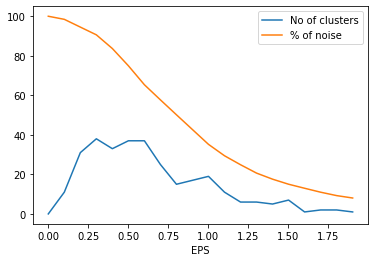

In [118]:
plt.xlabel("EPS")
plt.plot(eps_range, clust_n, label="No of clusters")
plt.plot(eps_range, clust_failure, label='% of noise')
plt.legend()
plt.show()

In [119]:
min_samples_range = range(3, 15)

clust_n = []
clust_failure = []

for min_samples in min_samples_range:
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

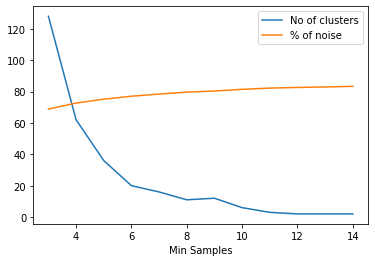

In [120]:
plt.xlabel("Min Samples")
plt.plot(min_samples_range, clust_n, label="No of clusters")
plt.plot(min_samples_range, clust_failure, label='% of noise')
plt.legend()
plt.show()

In [121]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)
print(len(set(clustering.labels_)) - 1)
print(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))
#if clust_n[i] <= 7 and clust_n[i] >=5 and clust_failure[i] <= 12:

6
6.287633163501621


In [122]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)

In [123]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

for label in set(clustering.labels_):
    print(label, np.count_nonzero(clustering.labels_ == label))

labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]

print(unique_labels)

0 8077
1 3
2 3
3 3
4 3
5 4
-1 543
[-1, 0, 1, 2, 3, 4, 5]


In [124]:
reduced_data = PCA(n_components=2).fit_transform(data)

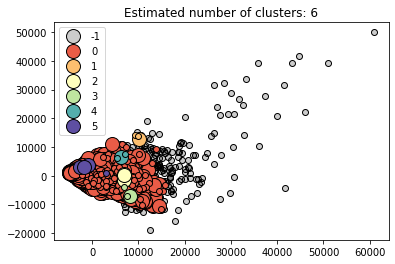

In [125]:
colors = [cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 0.2]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=k)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.legend()
plt.show()

## OPTICS

In [126]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, -1}
6
6.310792033348773


In [127]:
for label in set(clustering.labels_):
    print(label, np.count_nonzero(clustering.labels_ == label))

0 8077
1 3
2 3
3 3
4 2
5 3
-1 545


In [128]:
pca_data = PCA(n_components=2).fit_transform(data)

In [129]:
def plot_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

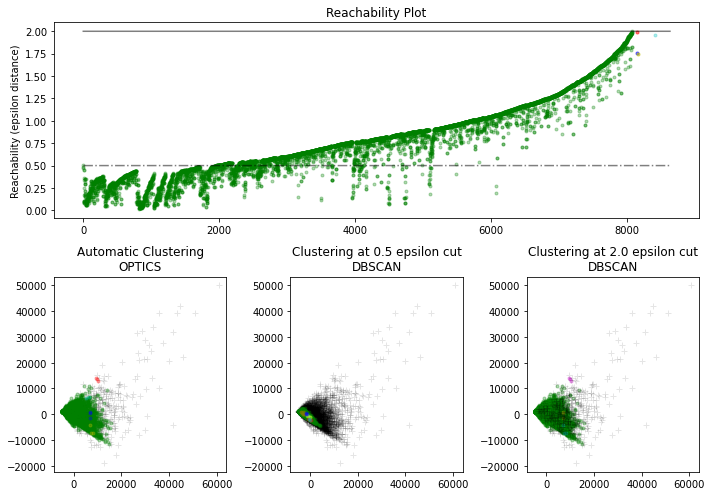

In [130]:
plot_optics(clustering)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
55
39.49745252431681


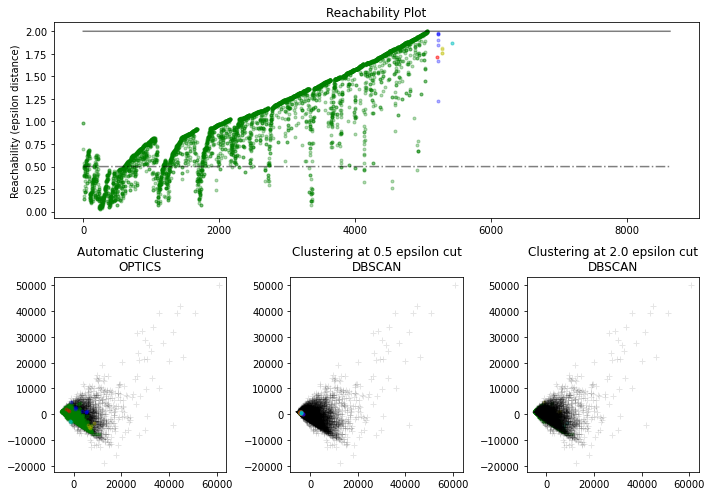

In [ ]:
metrics = ['cityblock', 'cosine', 'chebyshev', 'l1', 'braycurtis']

for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1,
                   cluster_method="dbscan", metric=metric).fit(scaled_data)

    print(set(clustering.labels_))
    print(len(set(clustering.labels_)) -1)
    print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

    plot_optics(clustering)